# Some basic discrete-time signals
Discrete-time signals are sequences, or functions with integer-valued arguments
$$ f:\, \mathbb{Z} \rightarrow \mathbb{R} $$
$$ f(k) \in \mathbb{k}, \; k \in \mathbb{Z} = \{\ldots, -2,-1,0,1,2,\ldots\}$$
Below are some important examples

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## The impulse function
$$ f(k) = \delta (k) = \begin{cases} 1 & k=0\\ 0 & \text{otherwise} \end{cases}$$

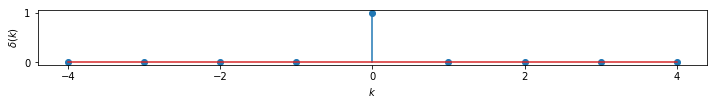

In [104]:
k = np.arange(-4,5)
plt.figure(figsize=(12,1))
plt.stem(k, k==0)
plt.xticks([-4,-2,0,2,4])
plt.xlabel('$k$')
plt.ylabel('$\delta(k)$');

## The shifted and scaled impulse function
$$ f(k) = \mathrm{q}a\delta (k) = a\delta(k+1) = \begin{cases} a & k=-1\\ 0 & \text{otherwise} \end{cases}$$
Note the *shift operator* q, whose definition is that it shifts the sequence forward (advances it). The impulse function has the property that it is equal to one if and only if the argument is equal to zero. So in the one-step-ahead shifted sequence $\mathrm{q}\delta(k)$ the value is one when $k+1=0$. 

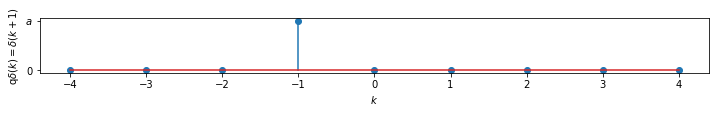

In [122]:
a = 1.4
k = np.arange(-4,5)
plt.figure(figsize=(12,1))
plt.stem(k, a*((k+1)==0))
plt.xticks(k); plt.yticks([0, a],['0', '$a$'])
plt.xlabel('$k$')
plt.ylabel('$\mathrm{q}\delta(k) = \delta(k+1)$');


## The unit step function
$$ f(k) = u_s (k) = \begin{cases} 1 & k\ge 0\\ 0 & k < 0 \end{cases}$$

Text(0,0.5,'$u_s(k)$')

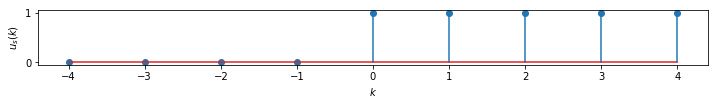

In [99]:
k = np.arange(-4,5)
plt.figure(figsize=(12,1)); 
plt.stem(k, k>=0)
plt.xticks(k)
plt.xlabel('$k$')
plt.ylabel('$u_s(k)$')

## Connection between the impulse and the step function
The impulse funktion is obtained by taking the first difference of the step function
$$ \delta(k) = (1-\text{q}^{-1})u_s(k) = u_s(k)-u_s(k-1). $$
Note the *shift operator* q, whose definition is that it shifts the sequence forward (advaneces it). Consequently the inverse shift operator $\text{q}^{-1}$ shifts the sequence backwards (delays it) one step.

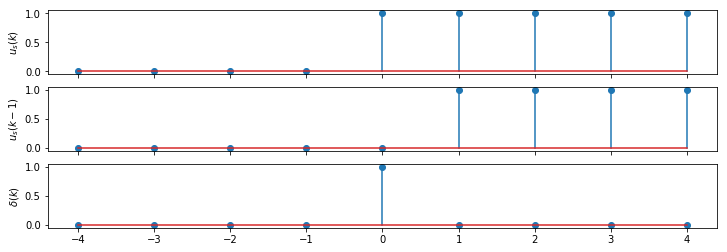

In [105]:
k = np.arange(-4,5)
us = k>=0
us_shift1 = k>=1 # The shifted sequence is one when k-1 >=0 <=> k>= 1
fig,axs = plt.subplots(3,1, sharex=True, figsize=(12,4))
axs[0].stem(k, us); axs[0].set(ylabel  = '$u_s(k)$')
axs[1].stem(k, us_shift1); axs[1].set(ylabel  = '$u_s(k-1)$')
axs[2].stem(k, k==0) ; axs[2].set(ylabel  = '$\delta(k)$');

Clearly the bottom sequence is obtained by subtracting the second sequence from the first.

The unit step function can be obtained by summing over the impulse funktion
$$ u_s(k) = \sum_{i=-\infty}^k \delta(i). $$

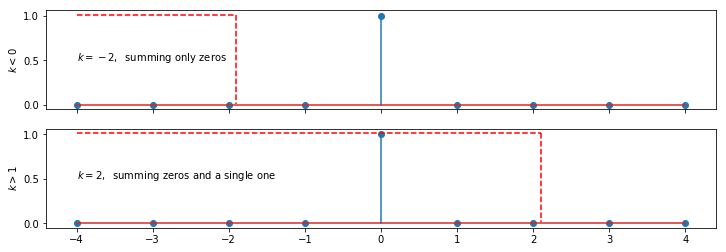

In [107]:
k = np.arange(-4,5)
dlta = k==0
fig,axs = plt.subplots(2,1, sharex=True, figsize=(12,4))
axs[0].stem(k, dlta); axs[0].set(ylabel  = '$k < 0$')
axs[1].stem(k, dlta); axs[1].set(ylabel  = '$k > 1$')
axs[0].plot([-4,-1.9], [1.01, 1.01], 'r--')
axs[0].plot([-1.9,-1.9], [1.01, .01], 'r--')
axs[0].text(-4,0.5, '$k=-2,\;$ summing only zeros')
axs[1].plot([-4, 2.1], [1.01, 1.01], 'r--')
axs[1].plot([2.1, 2.1], [1.01, .01], 'r--')
axs[1].text(-4,0.5, '$k=2,\;$ summing zeros and a single one');

## Real exponential
The real exponential is
$$ f(k) = a^k. $$
Let's look at three cases 
### Exampel 1 $a=0.5$

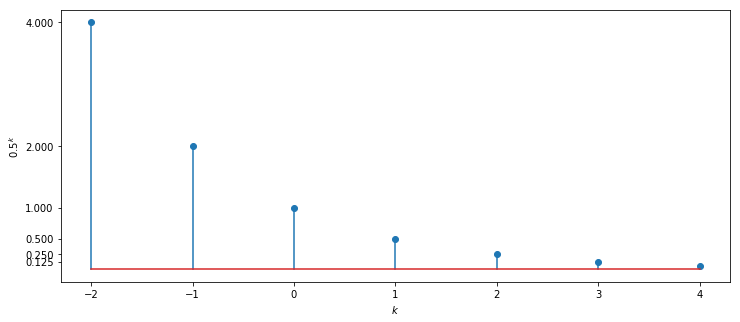

In [109]:
a = 0.5
k = np.arange(-2,5)
plt.figure(figsize=(12,5))
plt.stem(k, np.power(a, k))
plt.xticks(k); plt.yticks(np.power(a,k[:-1]))
plt.xlabel('$k$')
plt.ylabel('$0.5^k$');

### Exampel 2 $a = 2$

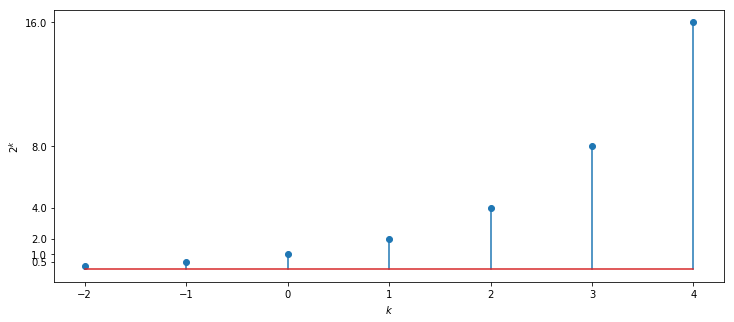

In [110]:
a = 2.0
k = np.arange(-2,5)
plt.figure(figsize=(12,5))
plt.stem(k, np.power(a, k))
plt.xticks(k); plt.yticks(np.power(a,k[1:]))
plt.xlabel('$k$')
plt.ylabel('$2^k$');

### Exampel 3 $a = -0.8$

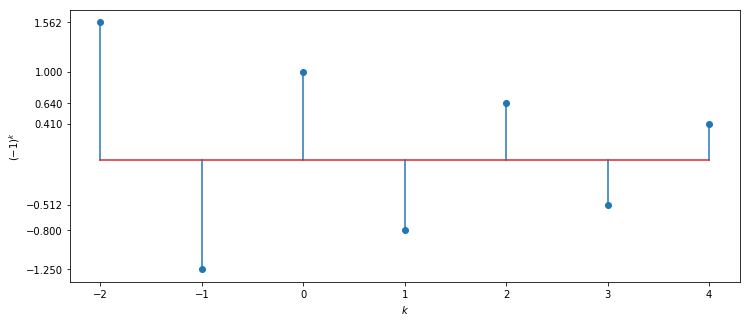

In [111]:
a = -.8
k = np.arange(-2,5)
plt.figure(figsize=(12,5))
plt.stem(k, np.power(a, k))
plt.xticks(k); plt.yticks(np.power(a,k[:]))
plt.xlabel('$k$')
plt.ylabel('$(-1)^k$');

## Sinusoid
$$ f(k) = a\sin(\omega_0 k + \phi), \quad k \in \mathbb{Z},\quad a,\omega_0, \phi \in \mathbb{R} $$

The discrete-time sinusoid has two important differences compared to the continuous-time sinusoid:

### It has infinitely many *aliases* at frequencies that are multiples of $2\pi$
$$\sin\big((\omega_0 + n2\pi)k + \phi\big) = \sin(\omega_0k + \phi), \quad n\in\mathbb{Z}$$ 
This means that the signal with frequency $\omega_0$ and the signal with frequency $\omega_0 + n2\pi$, where $n$ is an integer, are identical. 

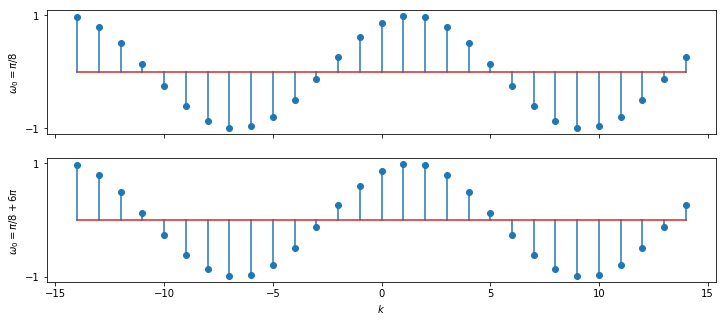

In [114]:
a = 1.0; w0 = np.pi/8; phi = np.pi/3; n=3
k = np.arange(-14,15)
fig,axs = plt.subplots(2, 1, sharex=True,figsize=(12,5))
axs[0].stem(k, np.sin(w0*k+phi))
axs[1].stem(k, np.sin((w0+2*np.pi*n)*k+phi))
axs[0].set(yticks=[-1,1])
axs[1].set(yticks=[-1,1])
axs[0].set(ylabel='$\omega_0=\pi/8$')
axs[1].set(ylabel='$\omega_0=\pi/8 + 6\pi$')
plt.xlabel('$k$');

In the example above, wee see that we cannot know by just looking at a discrete-time sinusoid, which of the alias frequencies it has ($\omega_0=\pi/8$ and $\omega_0+n2\pi=\pi/8 + 6\pi$ in the example). 

Since the discrete-time sinusoid is often obtained by sampling a continuous-time sinusoid, we reach the very important conclusion that **continous-time sinusoids of frequency $\omega_0$ and $\omega_0 + n\omega_s$ have the same sample values**, and so are not distinguishable when sampled. Here $\omega_s$ is the sampling frequency in radians per second. This has profound consequences when dealing with sampled signals and systems.

### The discrete-time sinusoid is not always periodic
This is due to the fact that the argument $\omega_0k + \phi$ to the sinusoid is only taking on discrete values, and not all real values as in the continuous-time case.
The discrete-time sinusoid is periodic when $f(k+N) = f(k)$ for some integer $N$. This requires that 
$$\omega_0(k+N) = \omega_0k + 2\pi M, $$
$$ \omega_0k +  \omega_0N = \omega_0k + 2\pi M $$
for some integers $N$ and $M$. This gives 
$$\omega_0N = 2\pi M \quad \Leftrightarrow \quad \frac{\omega_0}{2\pi} = \frac{M}{N},$$
which means that the ratio of $\omega_0$ to $2\pi$ must be a rational number. The periodicity will be $N$, and the sequence will repeat after $M$ whole wavelengths.

The above analysis show that we can have discrete-time sinusoids that are periodic where the period length is longer than one wavelength. To obtain a discrete-time sinusoid in which the period equals one wavelength we must require that
$$ \omega_0k + \omega_0N = \omega_0k + 2\pi \quad \Rightarrow \quad \omega_0 = \frac{2\pi}{N}. $$

#### Example 1:  Periodic with periodiciy equal to one wavelength $\omega_0 = \pi/8$, $\phi=\pi/3$

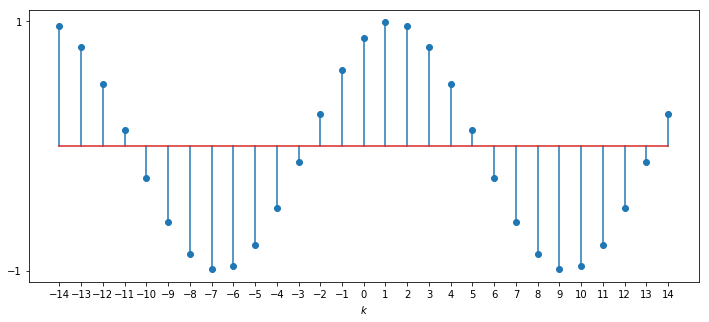

In [75]:
w0 = np.pi/8; phi = np.pi/3
k = np.arange(-14,15)
plt.figure(figsize=(12,5))
plt.stem(k, np.sin(w0*k+phi))
plt.xticks(k); plt.yticks([-1,1])
plt.xlabel('$k$')
plt.ylabel('');

#### Example 2: Periodic with periodiciy equal to two wavelengths $\omega_0 = 4\pi/17$, $\phi=\pi/3$
This gives a sequence which has periodicity 17 and repeats after two wavelengths.

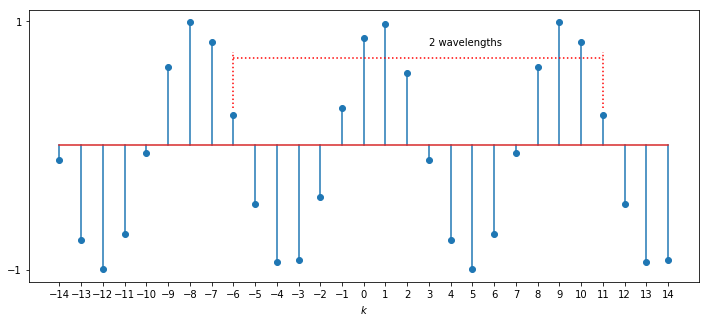

In [116]:
N = 17; M = 2
w0 = M*2*np.pi/N; phi = np.pi/3
k = np.arange(-14,15)
plt.figure(figsize=(12,5))
plt.stem(k, np.sin(w0*k+phi))
plt.plot([-6, -6], [0.3, 0.75], 'r:')
plt.plot([-6+N, -6+N], [0.3, 0.75], 'r:')
plt.plot([-6, -6+17], [0.7, 0.7], 'r:')
plt.text(3, 0.8, '%d wavelengths' %M)
plt.xticks(k); plt.yticks([-1,1])
plt.xlabel('$k$');

#### Example 3: Aperiodic  $\omega_0 = 1$, $\phi = \pi/3$

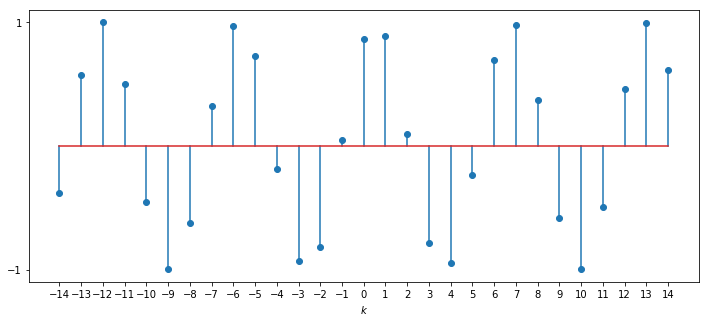

In [76]:
w0 = 1
phi = np.pi/3
k = np.arange(-14,15)
plt.figure(figsize=(12,5))
plt.stem(k, np.sin(w0*k+phi))
plt.xticks(k); plt.yticks([-1,1])
plt.xlabel('$k$')
plt.ylabel('');

#### Exercise: Construct an example with periodicity of three wavelengths

In [ ]:
#Your code here

## Discrete complex exponential
$$ f(k) = a^k, \quad a \in \mathbb{C}, \quad k \in \mathbb{Z} $$

Writing the complex number $a$ on polar form gives
$$ f(k) = \big(r\mathrm{e}^{i\omega_0}\big)^k = r^k\mathrm{e}^{ik\omega_0} =  r^k\cos(k\omega_0) + ir^k\sin(k\omega_0), $$
which gives a sequence that looks like a discrete spiral in the complex plane. If the magnitude of $a$ is less than one, $r<1$, then the spiral approached the origin. If the magnitude is greater than one it spirals outwards to infinity. If $r=1$, the complex sequence consists of points on the unit circle, each with the same phase distance to the previous point.

### Connection to sinusoids
Complex exponentials and sinusoids are closely connected through Euler's formula:
\begin{align}
     \sin(\omega_0 t) &= \frac{1}{2i} \big(\mathrm{e}^{i\omega_0 k} - \mathrm{e}^{-i\omega_0 k} \big) = \mathrm{Im} \{ \mathrm{e}^{i\omega_0 k} \}\\
     \cos(\omega_0 k) &= \frac{1}{2} \big(\mathrm{e}^{i\omega_0 k} + \mathrm{e}^{-i\omega_0 k} \big) = \mathrm{Re} \{ \mathrm{e}^{i\omega_0 k} \} 
\end{align}
So, as for the case of sinusoids, we see that discrete-time complex exponentials will be periodic with period of $2\pi$ if and only if $\omega_0 can be written 
$$ \omega_0 = \frac{2\pi}{N}, \quad N \in \mathbb{Z}. $$

More importantly, all discrete-time complex exponentials $f(k) = \mathrm{e}^{i\omega k}$ with 
$$ \omega = \omega_0 + n2\pi, \quad n \in \mathbb{Z} $$
are indistinguishable, or aliases, since 
$$ f(k) = \mathrm{e}^{i\omega k} = \mathrm{e}^{ik(\omega_0 + n2\pi)} = \mathrm{e}^{ik\omega_0 + ink2\pi} = \big(\mathrm{e}^{i2\pi}\big)^{(nk)} \mathrm{e}^{i\omega_0 k} = 1^{(nk)}\mathrm{e}^{i\omega_0 k} = \mathrm{e}^{i\omega_0 k}. $$ 
However, also $-\omega_0 + n2\pi$ are alias frequencies to $\omega_0$, since 
\begin{align}
\sin(\omega_0 k) &= -\sin(-\omega_0k) = -\sin\big(-\omega_0 + 2n\pi)k\big) = - \frac{i}{2} \big( \mathrm{e}^{i(-\omega_0+ n2\pi)k} -\mathrm{e}^{-i(-\omega_0 + 2\pi) k} \big).
 \end{align}

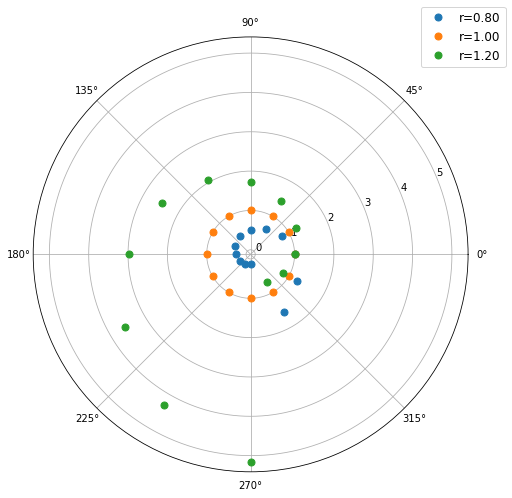

In [142]:
w0 = np.pi/6
k = np.arange(-2,10)
plt.figure(figsize=(8,8))
for r in [0.8, 1.0, 1.2]:
    a = r*np.complex(np.cos(w0), np.sin(w0))
    f = np.power(a, k)
    plt.polar(np.angle(f), np.abs(f), '.', markersize=14, label='r=%0.2f' %r)
plt.legend(loc='right',fontsize='large', bbox_to_anchor=(1.1,1));

### Exercise
Plot the function 
$$ f(k) = \mathrm{Im} \{ \big(1.2 \mathrm{e}^{i\frac{\pi}{12}}\big)^k\}$$

In [ ]:
w0 = np.pi/12; r=1.2
#a = # your code here
f = np.power(a, k)
k = np.arange(-2,20)
plt.figure(figsize=(12,4))
#plt.stem(k, ) # Your code here